![](imagenes/UC_FMRI.jpg)

---
*Andres Eduardo Aracena Rangel*

---

# Regresión Lineal de series brain promedio





Usaremos el módulo statsmodels de Python para implementar el método Ordinary Least Squares( OLS ) de regresión lineal.

&nbsp;
## Importamos librerias


In [54]:
import os # El módulo os nos permite acceder a funcionalidades dependientes del Sistema Operativo
from os.path import join as opj   # Este método concatena varios componentes de ruta con exactamente un separador de directorio(‘/’)
import matplotlib.pyplot as plt   # Permite la generación de gráficos
import pandas as pd               #Biblioteca para manipulación de marcos de datos

#Biblioteca para estimar modelos estadísticos y realizar pruebas estadísticas
import statsmodels.api as sm

## Definimos parámetros

In [55]:
# Ruta donde reposan las series promedios brain en archivo csv
path_brain = '/home/aracena/thesis_v1/02_fase2_extraccion_series_tiempo_brain/output/' 

# Ruta donde reposan las serie scan
path_scan = '/home/aracena/thesis_v1/03_fase3_extraccion_serie_tiempo_scan/output/' 

# Ruta donde reposan las series promedios 'brain' y 'series aleatorias' en archivo csv
path_1 = '/home/aracena/thesis_practica/tips_nipype/30_aic/output/' 

# Ruta donde se guardaran los resultados
path_output = '/home/aracena/thesis_v1/04_fase4_analisis_estadistico_aic/output'

# Crear la carpeta de salida
os.system('mkdir -p %s'%path_output)

0

## Definimos funciones

### Conjunto potencia del conjunto c

In [56]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

def potencia(c):
    """Calcula y devuelve el conjunto potencia del conjunto c.
       En matemáticas, el conjunto potencia de un conjunto dado es otro conjunto 
       formado por todos los subconjuntos del conjunto dado.
    """
    if len(c) == 0:
        return [[]]
    r = potencia(c[:-1])
    return r + [s + [c[-1]] for s in r]

### Función aplicacion modelo OLS

In [57]:
def estadisticos(li):
    # Y: normalmente significa la variable respuesta (variable dependiente o variable de respuesta)
    #define response variable
    Y = analisis['serie_gm']

    # X: usualmente significa nuestras variables de entrada (variables independientes o variables predictoras)
    X = analisis[li]

    #agregar constante a las variables predictoras [intercepción (beta_0) al modelo]
    X = sm.add_constant(X)

    #ajustamos modelo de regresión
    model = sm.OLS(Y, X).fit()    # sm.OLS(respuesta, entrada)

    #guardamos estadisticos AIC, R2, R2-AJUSTADO
    aic = model.aic
    r2 = model.rsquared
    r2_adj = model.rsquared_adj
    
    return aic, r2, r2_adj, model

## Cargamos las series aletoria

In [58]:
'''
Cargamos el archivo csv de las series brain promedio y scan
'''
serie_brain = pd.read_csv (opj(path_brain,'serie_tiempo_all_norm_prom.csv'))
serie_scan = pd.read_csv (opj(path_scan,'serie_scan_prom.csv'))

'''
Unimos series
'''
df_brain_1 = pd.merge(serie_brain, serie_scan,
                           right_index=True,left_index=True)
df_brain_1

,csf,gm,wm,scan
0,0.622821,0.639192,0.494004,0.812298
1,0.580436,0.468146,0.532795,0.320388
2,0.675788,0.500258,0.477732,0.142395
3,0.356185,0.322412,0.235042,0.724919
4,0.435692,0.482125,0.296830,0.559871
...,...,...,...,...
191,0.700562,0.728700,0.495834,0.650485
192,0.687571,0.584067,0.458032,0.737864
193,0.687965,0.581938,0.595453,0.310680
194,0.732741,0.608178,0.719285,0.601942


### Graficamos las series

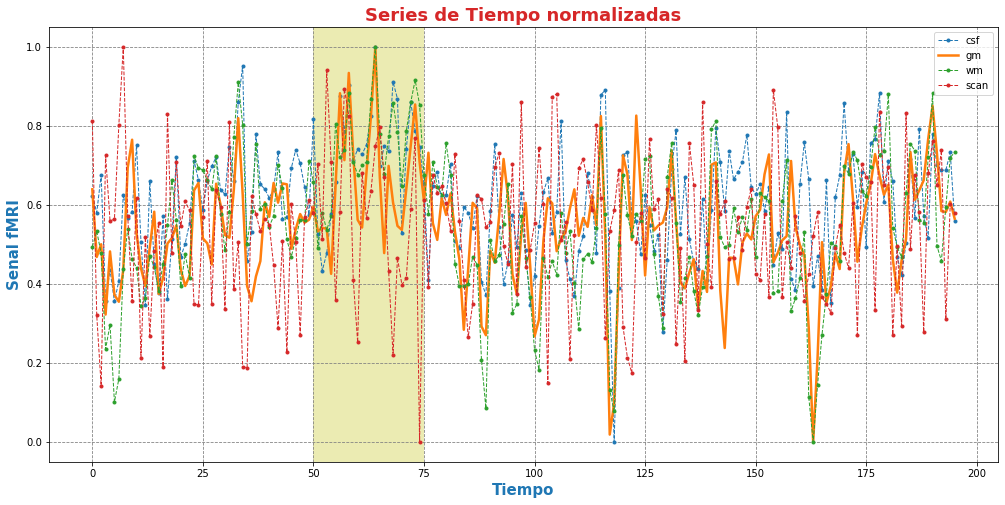

In [59]:
series=df_brain_1.columns.values  #extraemos nombre de las columnas en una lista
list_series=list(series)

vent_min = 50
vent_max = 75

titulo = 'Series de Tiempo normalizadas'
font1 = {'fontsize':15, 'fontweight':'bold', 'color':'tab:blue'}
font2  = {'fontsize':18, 'fontweight':'bold', 'color':'tab:red'}

fig, ax = plt.subplots(figsize = (17,8))
for i,serie in enumerate(list_series):
    if serie == 'gm':
        ax.plot(df_brain_1[serie], linewidth=2.5, label=serie)      
    else:           
        ax.plot(df_brain_1[serie], '--.', linewidth=1, label=serie)
ax.legend()
ax.set_xlabel('Tiempo',fontdict=font1)
ax.set_ylabel('Senal fMRI',fontdict=font1)
ax.set_title(titulo, fontdict = font2)
ax.grid(axis = 'x', color = 'gray', linestyle = 'dashed')
ax.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
ax.axvspan(vent_min,vent_max, alpha=0.3, facecolor='y')

## Eliminamos series gm y scan promedio del DataFrame (DF)

In [60]:
#eliminamos las series normalizadas gm y scan (no se trabaja con ellas en este momento)

df_brain = df_brain_1.drop(['gm'], axis=1)
df_brain

,csf,wm,scan
0,0.622821,0.494004,0.812298
1,0.580436,0.532795,0.320388
2,0.675788,0.477732,0.142395
3,0.356185,0.235042,0.724919
4,0.435692,0.296830,0.559871
...,...,...,...
191,0.700562,0.495834,0.650485
192,0.687571,0.458032,0.737864
193,0.687965,0.595453,0.310680
194,0.732741,0.719285,0.601942


## Cargamos las series de gm

In [61]:
df_gm = pd.read_csv (opj(path_1,'series_all_gm.csv'))
df_gm

,0,1,2,3,4,5,...,541,542,543,544,545,546
0,452.330078,484.700562,536.801208,385.436981,344.133972,421.929077,...,596.353271,591.753845,584.690430,591.884277,595.619934,591.222351
1,454.271118,486.022034,531.563965,373.838837,342.958008,415.983887,...,592.496216,590.503479,589.282410,590.586731,593.616577,593.259766
2,453.845520,485.580414,544.484253,375.099121,341.203644,406.436859,...,594.216064,589.259094,583.373230,594.377319,596.063904,593.041992
3,450.647522,488.226410,527.414307,375.057129,326.078705,410.242004,...,592.614807,590.419006,586.021729,593.123474,594.312439,590.987976
4,454.640686,472.761078,536.112366,377.241364,338.506195,407.452087,...,595.598450,594.122986,589.714905,594.799927,598.196655,597.456055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,452.560425,486.655609,542.498840,385.886200,346.620605,422.166718,...,597.843018,591.276428,589.285156,595.458008,593.184448,589.837158
192,447.691559,484.763550,539.284485,380.412201,339.944031,413.959839,...,603.223389,594.114929,589.459351,601.167480,598.060669,596.233093
193,460.608765,480.717743,537.810242,390.074341,321.665588,416.338470,...,602.842896,596.747986,588.690613,600.027771,599.644226,598.459595
194,462.956299,478.354706,534.311829,392.084229,326.157562,415.097412,...,601.641235,596.862854,586.225037,593.833984,599.410400,598.191711


In [62]:
pd.options.display.max_columns = 12 # para mejorar la visualización del DataFrame
df_gm

,0,1,2,3,4,5,...,541,542,543,544,545,546
0,452.330078,484.700562,536.801208,385.436981,344.133972,421.929077,...,596.353271,591.753845,584.690430,591.884277,595.619934,591.222351
1,454.271118,486.022034,531.563965,373.838837,342.958008,415.983887,...,592.496216,590.503479,589.282410,590.586731,593.616577,593.259766
2,453.845520,485.580414,544.484253,375.099121,341.203644,406.436859,...,594.216064,589.259094,583.373230,594.377319,596.063904,593.041992
3,450.647522,488.226410,527.414307,375.057129,326.078705,410.242004,...,592.614807,590.419006,586.021729,593.123474,594.312439,590.987976
4,454.640686,472.761078,536.112366,377.241364,338.506195,407.452087,...,595.598450,594.122986,589.714905,594.799927,598.196655,597.456055
...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,452.560425,486.655609,542.498840,385.886200,346.620605,422.166718,...,597.843018,591.276428,589.285156,595.458008,593.184448,589.837158
192,447.691559,484.763550,539.284485,380.412201,339.944031,413.959839,...,603.223389,594.114929,589.459351,601.167480,598.060669,596.233093
193,460.608765,480.717743,537.810242,390.074341,321.665588,416.338470,...,602.842896,596.747986,588.690613,600.027771,599.644226,598.459595
194,462.956299,478.354706,534.311829,392.084229,326.157562,415.097412,...,601.641235,596.862854,586.225037,593.833984,599.410400,598.191711


In [63]:
num_ser = df_gm.shape[1]
print('la mascara gm tiene, '+ str(num_ser) + ' voxels')

la mascara gm tiene, 547 voxels


## Aplicamos el modelo OLS

## Número de combinaciones

In [64]:
'''
extraemos nombre de las columnas del DF de las series a estudiar en una lista
'''
series=df_brain.columns.values
list_series=list(series)
list_series

['csf', 'wm', 'scan']

In [65]:
'''
Posibles combinaciones de las series para generar ser_tiem_sum
'''
#ejecutamos funcion potencia 'combi
combi = potencia(list_series)
combi

[[],
 ['csf'],
 ['wm'],
 ['csf', 'wm'],
 ['scan'],
 ['csf', 'scan'],
 ['wm', 'scan'],
 ['csf', 'wm', 'scan']]

In [66]:
# elimino primer elemento lista combi
combi.pop(0)
print('posibles combinaciones de las series brain:\n', combi, '\n\n')

print('cantidad de combinaciones/modelos:\n\n', len(combi))

posibles combinaciones de las series brain:
 [['csf'], ['wm'], ['csf', 'wm'], ['scan'], ['csf', 'scan'], ['wm', 'scan'], ['csf', 'wm', 'scan']] 


cantidad de combinaciones/modelos:

 7


## Regresión Lineal todos voxels mascara gm

## Probamos si el AIC me indica correctamente el mejor modelo

Para ello, sumaremos la series promedia brain, y ha esta senal le sumaremos  tres senales aleatorias de muy bajo valor y una senal de error aleatoria

In [67]:
a = pd.DataFrame()
b = pd.DataFrame()
aa = pd.DataFrame()
bb = pd.DataFrame()
aaa = pd.DataFrame()
bbb = pd.DataFrame()
for i in range(num_ser):
    #creamos una lista que identifica la serie del voxel, con la camtidad de combinaciones
    serie = []
    for j in enumerate(combi):
        serie.append(i)
    #se crea dataframe que identifica voxel en estudio
    df_serie = pd.DataFrame(serie, columns=['serie'])
    
    #extraemos la serie de tiempo del voxel i
    serie_estudio = df_gm.iloc[:,[i]]
    serie_estudio.columns=['serie_gm']
    
    #normalizamos
    min_val = serie_estudio.min()
    max_val = serie_estudio.max()

    serie_gm_norm = (serie_estudio-min_val)/(max_val-min_val)
    serie_gm_norm.columns= ['serie_gm']
    
    #Unimos serie_gm con las series brain
    analisis = pd.merge(serie_gm_norm, df_brain,
                           right_index=True,left_index=True)
    
    #Ejecutamos la funcion aic
    RESULTADO_AIC = {}
    RESULTADO_R2 = {}
    RESULTADO_R2_AJU = {}
    for i, c in enumerate(combi):
        li = combi[i]
        anali = estadisticos(li)
        AIC = round(anali[0],2)
        R2 = round(anali[1],4)
        R2_AJU = round(anali[2],4)        
        c = ','.join(c)
        RESULTADO_AIC[c] = AIC
        RESULTADO_R2[c] = R2
        RESULTADO_R2_AJU[c] = R2_AJU

        
    
    '''
    DataFrame AIC
    '''
    #representamos el resultado aic en un dataframe
    DF_AIC = pd.DataFrame(list(RESULTADO_AIC.items()),
                   columns=['MODELO', 'AIC'])
    
    #ordenamos de mayor a menor
    DFM_AIC = DF_AIC.sort_values('AIC')
    
    #restablecer el índice (para poder eliminar luego los dos ultimos)
    DFM_AIC.reset_index(drop=True, inplace=True)
    
    #unimos DFM con la identificacion del voxel
    best_model_aic = pd.merge(df_serie, DFM_AIC,
                       right_index=True,left_index=True)
    
    #elegimos el mejor modelo del voxel en estudio
    be = 1
    en =  len(combi)
    best_aic = best_model_aic.drop(range(1, en, 1),axis=0)
    
    if i == 0:
        # creamos a y b para concatenar los demas resultados
        a = best_model_aic
        b = best_aic
    else:
        best_model_aic = pd.concat([a, best_model_aic])
        best_aic = pd.concat([b, best_aic])
        a = best_model_aic
        b = best_aic
        
    #restablecer el índice
    best_model_aic.reset_index(drop=True, inplace=True)
    best_aic.reset_index(drop=True, inplace=True)
    
    
    '''
    DataFrame R2
    '''
    
    #representamos el resultado aic en un dataframe
    DF_R2 = pd.DataFrame(list(RESULTADO_R2.items()),
                   columns=['MODELO', 'R2'])
    
    #ordenamos de mayor a menor
    DFM_R2 = DF_R2.sort_values('R2',ascending=False)
    
    #restablecer el índice (para poder eliminar luego los dos ultimos)
    DFM_R2.reset_index(drop=True, inplace=True)
    
    #unimos DFM con la identificacion del voxel
    best_model_r2 = pd.merge(df_serie, DFM_R2,
                       right_index=True,left_index=True)
    
    #elegimos el mejor modelo del voxel en estudio
    be = 1
    en =  len(combi)
    best_r2 = best_model_r2.drop(range(1, en, 1),axis=0)
    
    if i == 0:
        # creamos a y b para concatenar los demas resultados
        aa = best_model_r2
        bb = best_r2
    else:
        best_model_r2 = pd.concat([aa, best_model_r2])
        best_r2 = pd.concat([bb, best_r2])
        aa = best_model_r2
        bb = best_r2
        
    #restablecer el índice
    best_model_r2.reset_index(drop=True, inplace=True)
    best_r2.reset_index(drop=True, inplace=True)

    
    '''
    DataFrame R2-ajustado
    '''
    #representamos el resultado aic en un dataframe
    DF_R2_AJU = pd.DataFrame(list(RESULTADO_R2_AJU.items()),
                   columns=['MODELO', 'R2-adj'])
    
    #ordenamos de mayor a menor
    DFM_R2_AJU = DF_R2_AJU.sort_values('R2-adj',ascending=False)
    
    #restablecer el índice (para poder eliminar luego los dos ultimos)
    DFM_R2_AJU.reset_index(drop=True, inplace=True)
    
    #unimos DFM con la identificacion del voxel
    best_model_aju = pd.merge(df_serie, DFM_R2_AJU,
                       right_index=True,left_index=True)
    
    #elegimos el mejor modelo del voxel en estudio
    be = 1
    en =  len(combi)
    best_r2_aju = best_model_aju.drop(range(1, en, 1),axis=0)
    
    if i == 0:
        # creamos a y b para concatenar los demas resultados
        aaa = best_model_aju
        bbb = best_r2_aju
    else:
        best_model_aju = pd.concat([aaa, best_model_aju])
        best_r2_aju = pd.concat([bbb, best_r2_aju])
        aaa = best_model_aju
        bbb = best_r2_aju
        
    #restablecer el índice
    best_model_aju.reset_index(drop=True, inplace=True)
    best_r2_aju.reset_index(drop=True, inplace=True)


#print(DFM_R2)
#print('\n',best_model)
#print('\n', best_aic)

In [68]:
#best_r2_aju

## Frecuencia AIC

In [69]:
freq = best_aic.groupby(['MODELO']).count()

#ordenamos de mayor a menor
freq_aic = freq.sort_values('serie',ascending=False)

porce_aic=freq_aic.drop('serie',axis=1) #eliminamos columa serie
porce_aic['% AIC'] = freq_aic['AIC']*100/num_ser
porce_aic['% AIC'] = round(porce_aic['% AIC'],2)
#porce_r2.columns.values[0] = "% R2" #cambiamos nombre de columna
porce_aic

,AIC,% AIC
MODELO,,
wm,179,32.72
csf,126,23.03
"csf,wm",118,21.57
scan,46,8.41
"wm,scan",38,6.95
"csf,scan",23,4.20
"csf,wm,scan",17,3.11


## Frecuencia R2

In [70]:
freq = best_r2.groupby(['MODELO']).count()

#ordenamos de mayor a menor
freq_r2 = freq.sort_values('serie', ascending=False)

porce_r2=freq_r2.drop('serie',axis=1) #eliminamos columa serie
porce_r2['% R2']=freq_r2['R2']*round(100/num_ser,2)
#porce_r2.columns.values[0] = "% R2" #cambiamos nombre de columna
porce_r2

,R2,% R2
MODELO,,
"csf,wm,scan",470,84.60
"csf,wm",42,7.56
"wm,scan",18,3.24
"csf,scan",14,2.52
csf,2,0.36
wm,1,0.18


In [71]:
porce_r2['% R2'][0]

84.6

## Frecuencia R2-AJUS

In [72]:
freq = best_r2_aju.groupby(['MODELO']).count()
#print(freq)
#ordenamos de mayor a menor
freq_r2adj = freq.sort_values('serie', ascending=False)
#freq_r2adj

In [73]:
porce_r2adj=freq_r2adj.drop('serie',axis=1) #eliminamos columa serie
porce_r2adj['% R2-adj']=freq_r2adj['R2-adj']*100/num_ser
porce_r2adj['% R2-adj'] = round(porce_r2adj['% R2-adj'],2)
#porce_r2adj.columns.values[0] = "% R2-adj" #cambiamos nombre de columna
porce_r2adj

,R2-adj,% R2-adj
MODELO,,
"csf,wm",141,25.78
wm,117,21.39
csf,85,15.54
"csf,wm,scan",67,12.25
"wm,scan",65,11.88
"csf,scan",39,7.13
scan,33,6.03


# Unimos Todos los resultados

In [74]:
df3 = pd.merge(porce_aic,porce_r2,on='MODELO',how='right')
print(df3)

             AIC  % AIC   R2   % R2
MODELO                             
csf,wm,scan   17   3.11  470  84.60
csf,wm       118  21.57   42   7.56
wm,scan       38   6.95   18   3.24
csf,scan      23   4.20   14   2.52
csf          126  23.03    2   0.36
wm           179  32.72    1   0.18


In [75]:
df4 = pd.merge(porce_aic.drop('AIC',axis=1),porce_r2.drop('R2',axis=1),on='MODELO',how='left')
df5 = pd.merge(df4,porce_r2adj.drop('R2-adj',axis=1),on='MODELO',how='left')
df5

,% AIC,% R2,% R2-adj
MODELO,,,
wm,32.72,0.18,21.39
csf,23.03,0.36,15.54
"csf,wm",21.57,7.56,25.78
scan,8.41,NaN,6.03
"wm,scan",6.95,3.24,11.88
"csf,scan",4.20,2.52,7.13
"csf,wm,scan",3.11,84.60,12.25


In [76]:
df5.max()[0]

32.72

In [77]:
def text_format(val):
    r1 = df5.max()[0]
    r2 = df5.max()[1]
    r3 = df5.max()[2]
    color = 'salmon' if val == r1 or val == r2 or val == r3 else 'white'
    return 'background-color: %s' % color

df5.style.applymap(text_format)

,% AIC,% R2,% R2-adj
MODELO,,,
wm,32.720000,0.180000,21.390000
csf,23.030000,0.360000,15.540000
"csf,wm",21.570000,7.560000,25.780000
scan,8.410000,nan,6.030000
"wm,scan",6.950000,3.240000,11.880000
"csf,scan",4.200000,2.520000,7.130000
"csf,wm,scan",3.110000,84.600000,12.250000


In [78]:
df6 = df5.reset_index()
df6

,MODELO,% AIC,% R2,% R2-adj
0,wm,32.72,0.18,21.39
1,csf,23.03,0.36,15.54
2,"csf,wm",21.57,7.56,25.78
3,scan,8.41,NaN,6.03
4,"wm,scan",6.95,3.24,11.88
5,"csf,scan",4.20,2.52,7.13
6,"csf,wm,scan",3.11,84.60,12.25


In [79]:
best_model = df6['% R2'].max()
indice = df6.index[df6['% R2'] == best_model].tolist()
print(type(indice))
indice = indice[0]

<class 'list'>


In [80]:
df6['MODELO'][indice]

'csf,wm,scan'

In [81]:
#https://www.delftstack.com/es/howto/python-pandas/pandas-get-index-of-row/

# UNIMOS TODOS RESULTADOS EN UN DATAFRAME

In [82]:
df5.style.\
    apply(lambda x : ['background-color: yellow' if v else '' for v in x == x.max()]).\
    apply(lambda x : ['background-color: red' if v else '' for v in x == x.min()]).\
    format({'id':'{:.0f}'})

,% AIC,% R2,% R2-adj
MODELO,,,
wm,32.720000,0.180000,21.390000
csf,23.030000,0.360000,15.540000
"csf,wm",21.570000,7.560000,25.780000
scan,8.410000,nan,6.030000
"wm,scan",6.950000,3.240000,11.880000
"csf,scan",4.200000,2.520000,7.130000
"csf,wm,scan",3.110000,84.600000,12.250000


In [83]:
#https://interactivechaos.com/es/python/scenario/aplicacion-de-colores-los-valores-de-un-dataframe-pandas

&nbsp;
# Fin